In [1]:
%load_ext autoreload
%autoreload 2

import time
import pickle
import numpy as np
from scipy import optimize
import copy
from openpyxl import load_workbook
from scipy.optimize import minimize_scalar
import functions as func

import matplotlib.pyplot as plt   
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']
plt.rcParams.update({"axes.grid" : True, "grid.color": "black", "grid.alpha":"0.25", "grid.linestyle": "--"})
plt.rcParams.update({'font.size': 14})




import ipywidgets as widgets # For interactive plots/buttons
from ipywidgets import interact
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
col = ['r', 'b', 'g', 'y', 'm', 'c']


 
from matplotlib import cm
plt.style.use('seaborn-whitegrid')
prop_cycle = plt.rcParams['axes.prop_cycle']
colors = prop_cycle.by_key()['color']

from HANCModel import HANCModelClass



/var/folders/1t/shy39gf516g7nrfy2pmdkn780000gn/T/ipykernel_33184/2389306821.py:31: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


**Parameter and policy values**

In [2]:
sigma_low = 0.5
G_base = 0.25 
paths = ['Y', 'L_hh', 'K', 'C_hh', 'U_hh']

**Initial model and Staitonary equilibrium**

In [3]:
# 1. Create instance of model
model = HANCModelClass(name = f'sigma = {sigma_low}')

# 2. Sigma parameter
model.par.sigma = sigma_low


# 3. Initial values
model.ss.r = 0.02*(1-0.1)
model.ss.wt = 1.00*(1-0.3)
model.ss.G = G_base


# 4. Initial steady state
print(f'Solving for base model with sigma = {model.par.sigma}')
model.find_ss()


# 5. Solving transition path for later comparison
model.compute_jacs(do_print=False)
model.find_transition_path(do_print=False, shocks=[])

Solving for base model with sigma = 0.5


**Model with permanent shock to productivity in the private sector**

In [4]:

# 1. Model with higher TFP 
model_perminant = model.copy(name='Transition shock')
model_perminant.par.Gamma_Y_ = 2.0
model_perminant.find_ss()


# 2. Solving transition path for later comparison
model_perminant.compute_jacs(do_print=False)
model_perminant.find_transition_path(do_print=False, shocks=[])



clearing_Y: terminal value is  -0.00000000, but ss value is  -0.00000065


**Transition path from low to high TFP**

In [5]:
# 1. Copy initial values at the initial TFP 
ini_ = model.ss.__dict__.copy()

# 2. Copy the model for finding transition path
model_trans = model_perminant.copy(name='Transition')

# 3. Jacobian and transition path
model_trans.compute_jacs(do_print=False)

# 4. Transition path from low to high TFP
model_trans.find_transition_path(do_print=True, shocks=[], ini=ini_)
# Note: there is an error in clearing_Y but i asume it is a numerical error

finding the transition path:
 it =   0 -> max. abs. error = 2.42e+00
   1.04e+00 in clearing_A
   2.42e+00 in clearing_Y
   3.92e-02 in clearing_G
 it =   1 -> max. abs. error = 3.15e-01
   3.15e-01 in clearing_A
   3.10e-01 in clearing_Y
   1.01e-02 in clearing_G
 it =   2 -> max. abs. error = 1.99e-01
   1.94e-01 in clearing_A
   1.99e-01 in clearing_Y
   1.11e-02 in clearing_G
 it =   3 -> max. abs. error = 4.26e-02
   2.22e-02 in clearing_A
   4.26e-02 in clearing_Y
   8.73e-03 in clearing_G
 it =   4 -> max. abs. error = 8.74e-03
   2.91e-03 in clearing_A
   8.74e-03 in clearing_Y
   5.13e-03 in clearing_G
 it =   5 -> max. abs. error = 3.73e-03
   3.73e-03 in clearing_A
   8.75e-04 in clearing_Y
   2.60e-03 in clearing_G
 it =   6 -> max. abs. error = 2.12e-03
   2.12e-03 in clearing_A
   1.72e-04 in clearing_Y
   1.34e-03 in clearing_G
 it =   7 -> max. abs. error = 8.48e-04
   8.48e-04 in clearing_A
   9.41e-05 in clearing_Y
   5.51e-04 in clearing_G
 it =   8 -> max. abs. erro

**Problem with the model**

In [6]:
# Printing Gammas - Gamma_Y is not equal to ini gama in the transition model period 0
print('Productivity levels in SS')
print(f'Model base = {model.path.Gamma_Y[0]}')
print(f'Model perminant = {model_perminant.path.Gamma_Y[0]}')

print('Productivity levels in transition')
ini_gama = ini_['Gamma_Y']
print(f'Ini gama = {ini_gama}')
print(f'Model transition = {model_trans.path.Gamma_Y[0]}, should be equal to model ini and base')

Productivity levels in SS
Model base = [1.]
Model perminant = [2.]
Productivity levels in transition
Ini gama = 1.0
Model transition = [2.], should be equal to model ini and base


### shocks ###


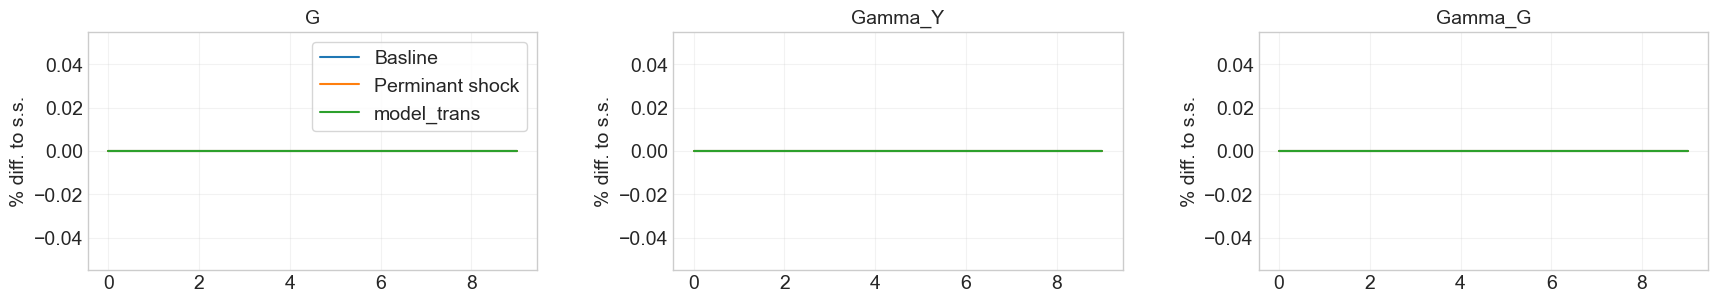


### varnames ###


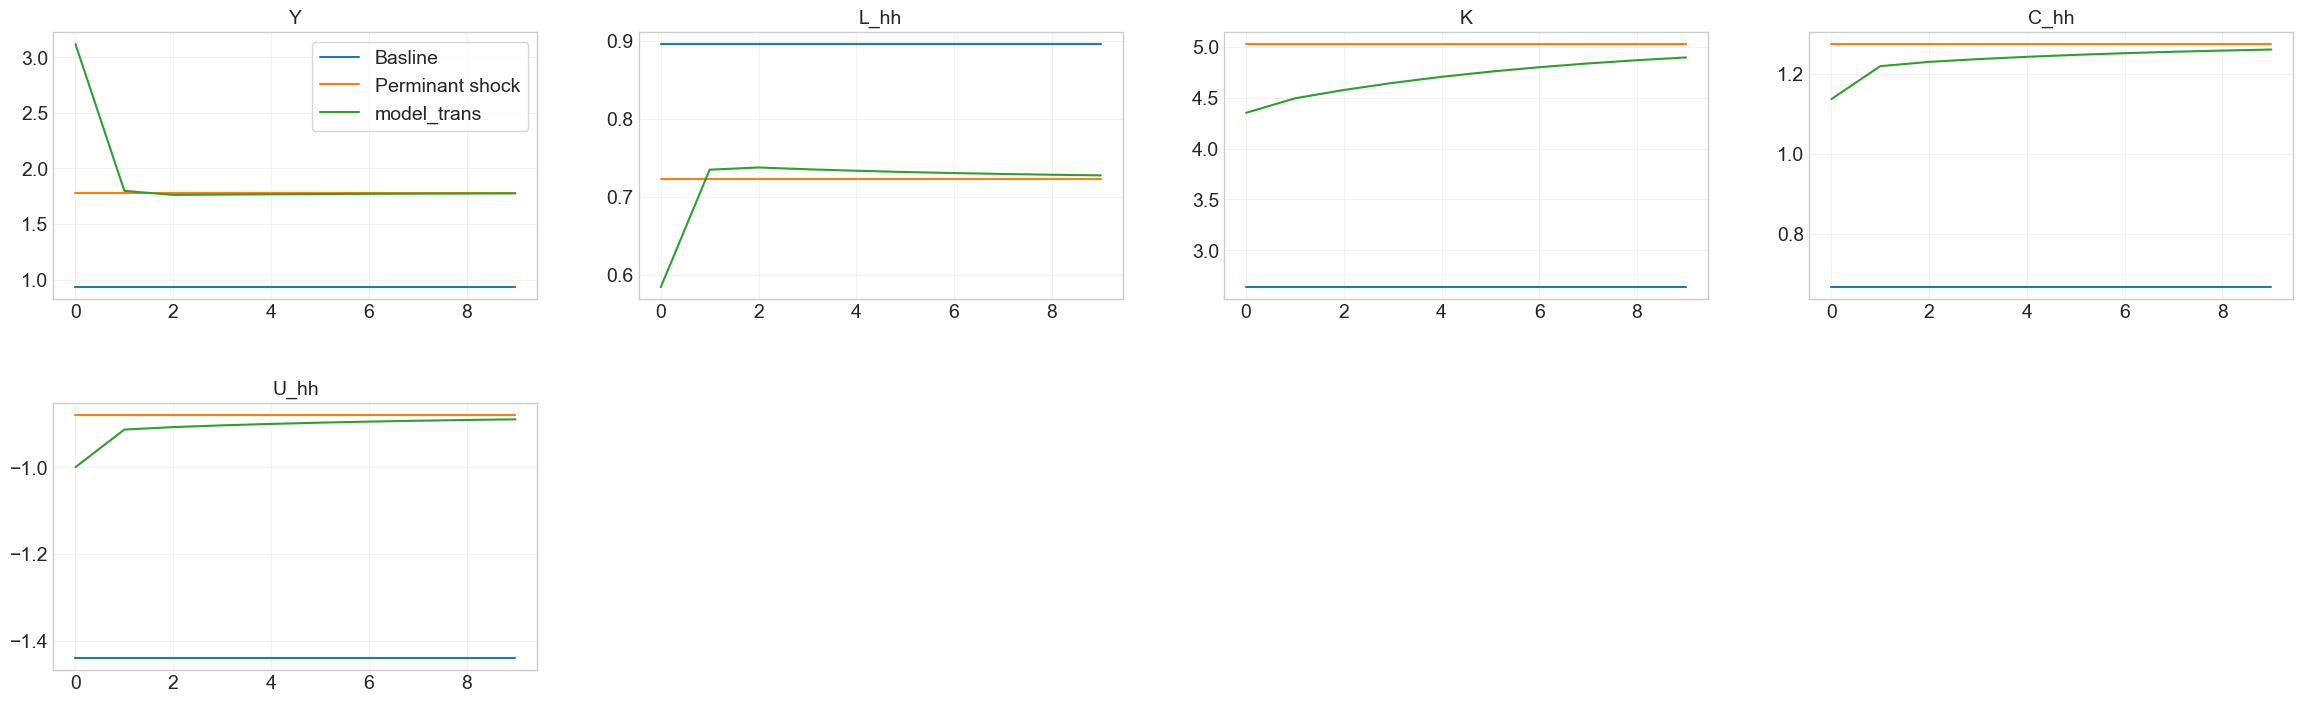


### tagets ###


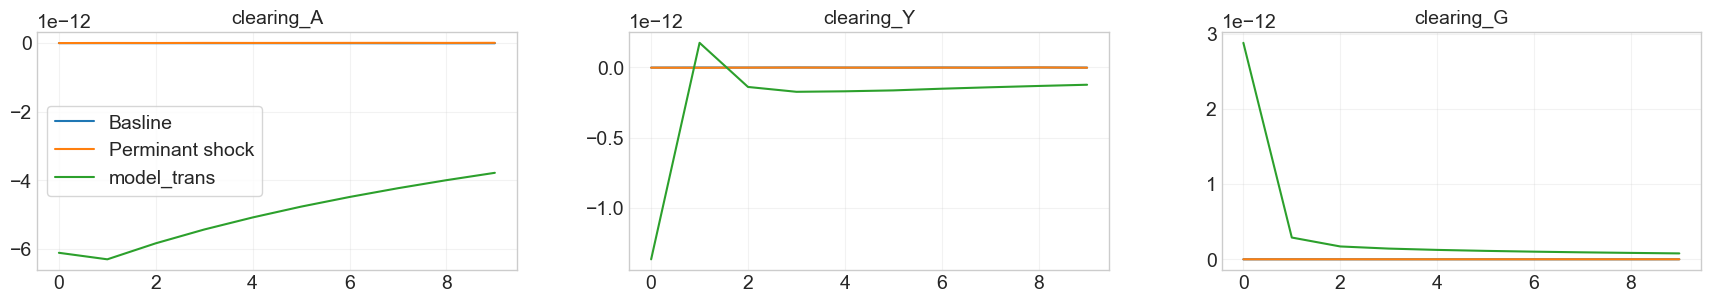

In [7]:
# IRF's for graphs
model.compare_IRFs([model, model_perminant, model_trans], ['Basline', 'Perminant shock', 'model_trans'], varnames=paths, lvl_value = paths, T_max=10)

In [8]:
# Initial Y values and calculated Y values

def calc_Y(K, L, Gamma_Y):
    return  Gamma_Y * K**model.par.kappa * L**(1-model.par.kappa) 


base_Y_calc = calc_Y(model.ss.K, model.path.L_Y[0], 1.0)
per_Y_calc = calc_Y(model_perminant.ss.K, model.path.L_Y[0], 2.0)
trans_Y_calc = calc_Y(ini_['K'], model_trans.path.L_Y[0], 2.0) #K_Lag = initial K in the base level 

print('Y in basline model and 1 period of transition model')
print(f'Y in period 0 for Baseline = {model.path.Y[0]}')
print(f'Y in period 0 for Transition = {model_trans.path.Y[0]}')
print(f'\n')

# # Values of Y in period 0 for each model
print('Y in basline model and 1 period of transition model calculated')
print(f'Y in period 0 for Baseline = {base_Y_calc}')
print(f'Y in period 0 for Transition = {trans_Y_calc}')
# print(f'Y in period 0 for Perminant shock = {per_Y_calc}')

Y in basline model and 1 period of transition model
Y in period 0 for Baseline = [0.93119674]
Y in period 0 for Transition = [3.11726225]


Y in basline model and 1 period of transition model calculated
Y in period 0 for Baseline = [0.93119674]
Y in period 0 for Transition = [1.10859279]
